<a href="https://colab.research.google.com/github/MarcelodeFreitas/udemy_deep_learning_pytorch_python/blob/main/Projeto_6_Classifica%C3%A7%C3%A3o_multiclasse_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 6: Classificação multiclasse iris

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
torch.__version__

c:\Users\pc\Documents\GitHub\udemy_deep_learning_pytorch_python\udemy_deep_learning_pytorch_python\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.1+cpu'

## Etapa 2: Base de dados

In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [3]:
base = pd.read_csv('./databases/iris.csv')

In [4]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='class', ylabel='count'>

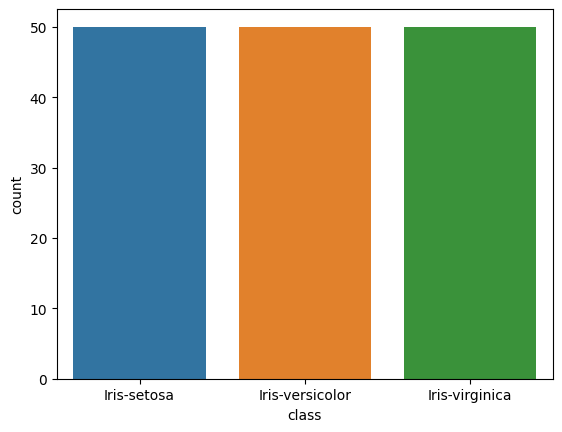

In [12]:
sns.countplot(base, x="class")

In [ ]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [ ]:
previsores.shape

(150, 4)

In [ ]:
classe.shape

(150,)

In [ ]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [ ]:
np.unique(classe)

array([0, 1, 2])

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size=0.25)

In [ ]:
previsores_treinamento.shape

(112, 4)

In [ ]:
classe_treinamento.shape

(112,)

In [ ]:
previsores_teste.shape

(38, 4)

In [ ]:
classe_teste.shape

(38,)

In [ ]:
type(previsores_treinamento)

numpy.ndarray

In [ ]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype=torch.long)

In [ ]:
type(previsores_treinamento)

torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

## Etapa 3: Construção do modelo

In [ ]:
# 4 -> 4 -> 4 -> 3
# (entradas + saídas) / 2 = (4 + 3) / 2
classificador = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classificador.parameters(), lr = 0.001,
                       weight_decay = 0.0001)

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle=True)

## Etapa 4: Treinamento do modelo

In [ ]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad()

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optimizer.step()

    running_loss += loss.item()

  print('Época %3d: perda %.5f - accuracy %.5f' % (epoch + 1, running_loss/len(train_loader),
        running_accuracy/len(train_loader)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Época   1: perda 1.09292 - accuracy 0.38333
Época   2: perda 1.09938 - accuracy 0.35000
Época   3: perda 1.09928 - accuracy 0.35000
Época   4: perda 1.09294 - accuracy 0.38333
Época   5: perda 1.08716 - accuracy 0.41667
Época   6: perda 1.09927 - accuracy 0.35000
Época   7: perda 1.09279 - accuracy 0.38333
Época   8: perda 1.09264 - accuracy 0.38333
Época   9: perda 1.09817 - accuracy 0.35000
Época  10: perda 1.09378 - accuracy 0.38333
Época  11: perda 1.09369 - accuracy 0.38333
Época  12: perda 1.09830 - accuracy 0.35000
Época  13: perda 1.09920 - accuracy 0.35000
Época  14: perda 1.09253 - accuracy 0.38333
Época  15: perda 1.09774 - accuracy 0.35000
Época  16: perda 1.09390 - accuracy 0.38333
Época  17: perda 1.09903 - accuracy 0.35000
Época  18: perda 1.09905 - accuracy 0.35000
Época  19: perda 1.08740 - accuracy 0.41667
Época  20: perda 1.09240 - accuracy 0.38333
Época  21: perda 1.09234 - accuracy 0.38333
Época  22: perda 1.09228 - accuracy 0.38333
Época  23: perda 1.10101 - accur

## Etapa 5: Avaliação do modelo

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
type(previsores_teste)

numpy.ndarray

In [ ]:
previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)

In [ ]:
previsoes = classificador(previsores_teste)

In [ ]:
previsoes

tensor([[-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
        [-0.0056,  0.2019,  0.0422],
 

In [ ]:
0.3049 + 0.3752 + 0.3199

1.0

In [ ]:
F.softmax(previsoes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.3049, 0.3752, 0.3199],
        [0.304

In [ ]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]

In [ ]:
previsoes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
matriz = confusion_matrix(previsoes, classe_teste)
matriz

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

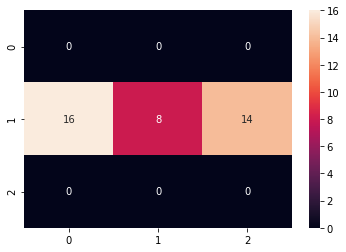

In [ ]:
sns.heatmap(matriz, annot=True)